In [2]:
!pip install trimesh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.8/693.8 kB 11.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import trimesh

In [4]:
# Define the number of points per mesh
num_points = 1024

def read_off_file(file_path):
    # Load the mesh from the OFF file
    mesh = trimesh.load(file_path)
    print(file_path)
    # Sample or pad/truncate vertices to ensure consistent number of points
    if len(mesh.vertices) >= num_points:
        vertices = mesh.vertices[:num_points]
    else:
        pad_size = num_points - len(mesh.vertices)
        vertices = np.pad(mesh.vertices, ((0, pad_size), (0, 0)), mode='wrap')

    return vertices

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the directory containing the ModelNet10 dataset in your Google Drive
dataset_dir = '/content/drive/MyDrive/DLAssignment2/ModelNet10'

# List of class names
class_names = os.listdir(dataset_dir)

# Initialize lists to store data and labels
data = []
labels = []

# Load data from OFF files
for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        for split in ['train', 'test']:
            split_dir = os.path.join(class_dir, split)
            if os.path.isdir(split_dir):
                for file_name in os.listdir(split_dir):
                    if file_name.endswith('.off'):
                        file_path = os.path.join(split_dir, file_name)
                        vertices = read_off_file(file_path)
                        data.append(vertices)
                        labels.append(class_name)

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0001.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0002.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0003.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0005.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0013.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0010.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0015.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0008.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0012.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0004.off
/content/drive/MyDrive/DLAssignment2/ModelNet10/dresser/train/dresser_0007.off
/c

In [5]:
print(data.shape)

(4899, 1024, 3)


In [6]:
print(labels.shape)

(4899,)


In [7]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode labels to numerical values
labels_encoded = label_encoder.fit_transform(labels)

In [8]:
# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the neural network architecture
model = models.Sequential([
    layers.Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(None, 3)),
    layers.BatchNormalization(),
    layers.Conv1D(filters=128, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Conv1D(filters=1024, kernel_size=1, activation='relu'),
    layers.BatchNormalization(),
    layers.GlobalMaxPooling1D(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

print(X_train.dtype)
print(X_test.dtype)
print(y_train.dtype)
print(y_test.dtype)
print(X_val.dtype)
print(y_val.dtype)

(3135, 1024, 3)
(980, 1024, 3)
(3135,)
(980,)
(784, 1024, 3)
(784,)
float64
float64
int64
int64
float64
int64


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


98/98 - 19s - loss: 1.3836 - accuracy: 0.5691 - val_loss: 2.3469 - val_accuracy: 0.1403 - 19s/epoch - 194ms/step
Epoch 2/50
98/98 - 5s - loss: 1.0312 - accuracy: 0.6683 - val_loss: 2.7925 - val_accuracy: 0.2232 - 5s/epoch - 53ms/step
Epoch 3/50
98/98 - 5s - loss: 0.9484 - accuracy: 0.7008 - val_loss: 4.2699 - val_accuracy: 0.1378 - 5s/epoch - 48ms/step
Epoch 4/50
98/98 - 5s - loss: 0.8925 - accuracy: 0.7136 - val_loss: 6.6952 - val_accuracy: 0.1416 - 5s/epoch - 49ms/step
Epoch 5/50
98/98 - 5s - loss: 0.8698 - accuracy: 0.7113 - val_loss: 6.8150 - val_accuracy: 0.1403 - 5s/epoch - 48ms/step
Epoch 6/50
98/98 - 5s - loss: 0.8023 - accuracy: 0.7317 - val_loss: 6.6853 - val_accuracy: 0.1480 - 5s/epoch - 48ms/step
Epoch 7/50
98/98 - 5s - loss: 0.7448 - accuracy: 0.7566 - val_loss: 6.8417 - val_accuracy: 0.1416 - 5s/epoch - 49ms/step
Epoch 8/50
98/98 - 5s - loss: 0.7108 - accuracy: 0.7659 - val_loss: 4.4884 - val_accuracy: 0.2411 - 5s/epoch - 48ms/step
Epoch 9/50
98/98 - 5s - loss: 0.7222 - a

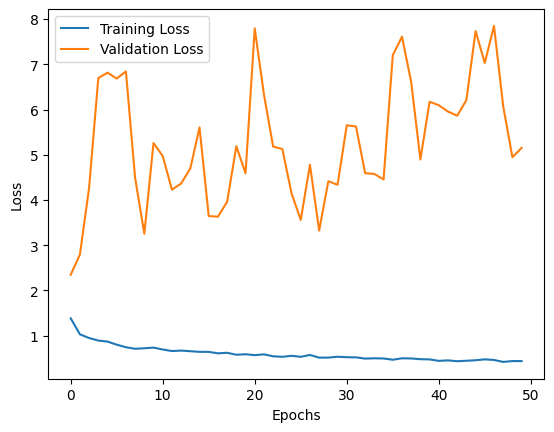

31/31 [==============================] - 1s 18ms/step - loss: 5.2060 - accuracy: 0.1541
Test Loss: 5.205972194671631
Test Accuracy: 0.15408162772655487


In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define callbacks
checkpoint_callback = ModelCheckpoint(filepath='model_checkpoint.h5', save_best_only=True, monitor='val_loss', mode='min')

# Train the model with callbacks
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=2,
                    callbacks=[checkpoint_callback])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
